In [3]:
import gym
import gym_tline

import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register

quads = [
    {'name':'QTN', 'base cost': 0.9, 'length':0.3, 'aperture': (0.185, 0.185), 'max int. G': 2.052, 'max current': 150},
    {'name':'QTR', 'base cost': 0.53/2, 'length':0.308, 'aperture': (0.130, 0.130), 'max int. G': 0.4997, 'max current': 50},
    {'name':'LQSA', 'base cost': 0.575, 'length':0.5, 'aperture': (0.09, 0.09), 'max int. G': 4.77, 'max current': 120},
    {'name':'QFS', 'base cost': 2.9, 'length':0.8, 'aperture': (0.1, 0.1), 'max int. G': 15.7, 'max current': 500}]
quads = [quads[0]]

env = gym.make('Tline-v0', lowlevel_madx=True, 
               quads=quads)

from IPython.core.display import display, HTML, Markdown

display(HTML("<style>.rendered_html { font-size: 17px; }</style>"))
display(HTML("<style>.container { width:100% !important; }</style>"))


In [4]:
def make_perfect_fodo(env, quads):
    env.reset()
#     env._generate_episode_parameters_simple_fodo()

    quad = quads[env.fodo_quad_id]
    fractional_strength = ((
        env.fodo_kl if env.fodo_entrance_foc else  -env.fodo_kl) 
        /(quad['max int. G']/env.beam_rigidity))
    print(fractional_strength, env.fodo_kl)
    for n_cell in range(env.n_cells):
        env.step([
            fractional_strength], w_eval=False)

        if env.fodo_exit_middle and n_cell==(env.n_cells-1):
            print('early stop, in the middle')
            break

        env.step([
            -fractional_strength])
        


In [5]:
register(
    id='Tline-v2',
    entry_point='gym_tline.envs:TlineEnv',
    kwargs = {'lowlevel_madx':True,
              'quads':quads, 
              'range_fodo_length': (15, 15),
              'range_fodo_phase_advance': np.deg2rad([32, 32])},
)

env = gym.make('Tline-v2')



0.5974184379799771 0.07350329488453311
early stop, in the middle
entrance foc is  True
stop in middle is  True
fodo length is  15.0 0.07350329488453311
phase advance is  32.0
energy is  5.0
total cost per m is  0.14769230769230773
reward is 18.967428263513288  from  end of line


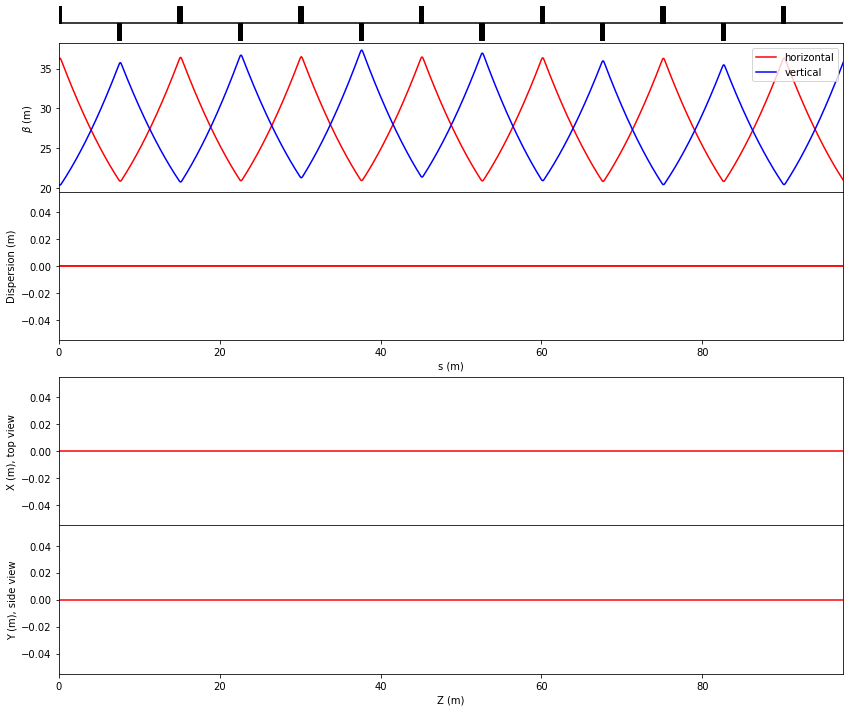

In [8]:


fig = plt.figure(figsize=(12,10))

make_perfect_fodo(env, quads)

observation, reward, episode_over, info = env.eval(interp=True)

env.render(fig)
# print(env.twissalCA Centre est gexl[['name', 's', 'k1l', 'betx', 'bety']]) 

print('entrance foc is ', env.fodo_entrance_foc)
print('stop in middle is ', env.fodo_exit_middle)
print('fodo length is ', env.fodo_length, env.fodo_kl)
print('phase advance is ', np.rad2deg(env.fodo_phase_advance))
print('energy is ', env.pc)
print('total cost per m is ', env.total_cost/env.s)
print('reward is', env.reward, ' from ', info['reward path'])

-0.5974184379799771 0.07350329488453311
early stop, in the middle
entrance foc is  False
stop in middle is  True
fodo length is  15.0 0.07350329488453311
phase advance is  32.0
energy is  5.0
total cost per m is  0.19200000000000003
reward is 18.93876999020902  from  end of line


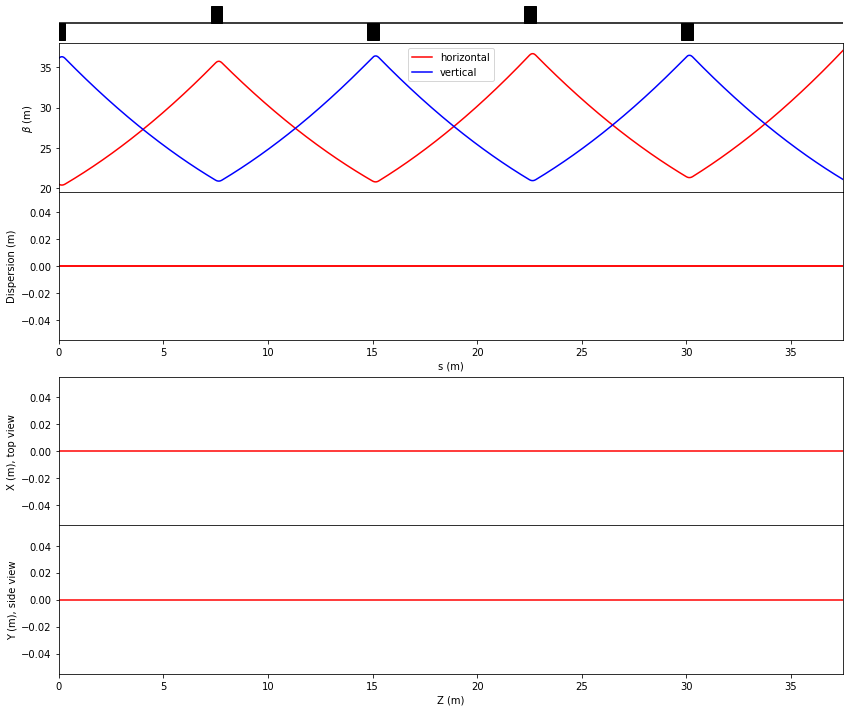

In [6]:
env = gym.make('Tline-v0', lowlevel_madx=True, 
#                      range_fodo_phase_advance=np.deg2rad([40, 80]),
#                      range_fodo_length = (10, 20),
#                      range_fodo_pc = (2, 30),
                     range_fodo_phase_advance=np.deg2rad([32, 32]),
                     range_fodo_length = (15, 15),
                     quads=quads)

fig = plt.figure(figsize=(12,10))

make_perfect_fodo(env, quads)

observation, reward, episode_over, info = env.eval(interp=True)

env.render(fig)
# print(env.twissalCA Centre est gexl[['name', 's', 'k1l', 'betx', 'bety']]) 

print('entrance foc is ', env.fodo_entrance_foc)
print('stop in middle is ', env.fodo_exit_middle)
print('fodo length is ', env.fodo_length, env.fodo_kl)
print('phase advance is ', np.rad2deg(env.fodo_phase_advance))
print('energy is ', env.pc)
print('total cost per m is ', env.total_cost/env.s)
print('reward is', env.reward, ' from ', info['reward path'])

-0.7450188915087906 0.14745556154224296
early stop, in the middle
entrance foc is  False
stop in middle is  True
fodo length is  12.935170979357748 0.14745556154224296
phase advance is  56.95853452885357
energy is  3.108166803282458
total cost per m is  0.27831097136210764
reward is 18.92261930999623  from  end of line


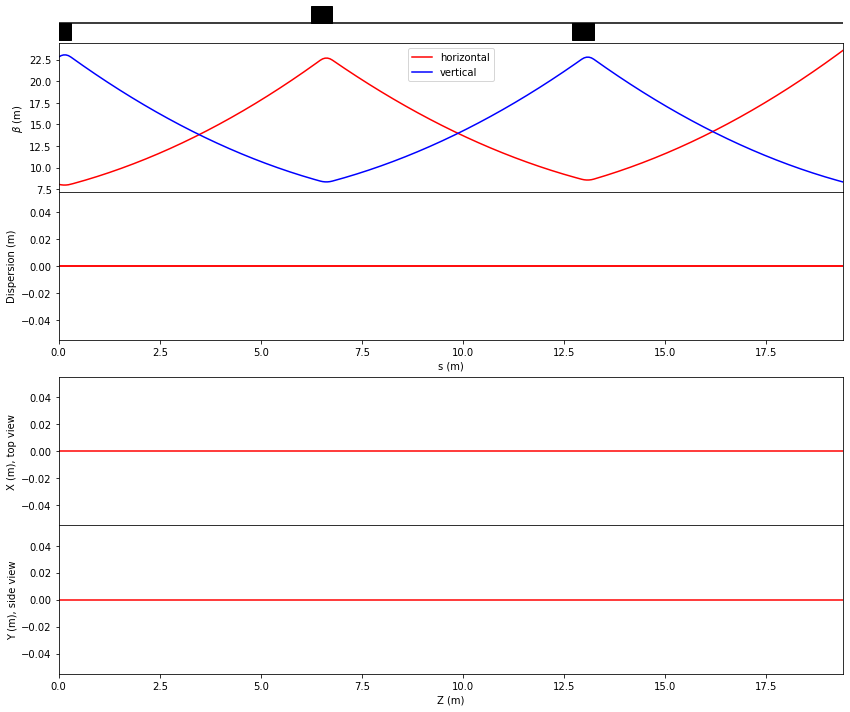

In [4]:
env = gym.make('Tline-v0', lowlevel_madx=True, 
               range_fodo_phase_advance=np.deg2rad([40, 80]),
               range_fodo_length = (10, 20),
               range_fodo_pc = (3, 8),
               quads=quads)

fig = plt.figure(figsize=(12,10))

make_perfect_fodo(env, quads)

observation, reward, episode_over, info = env.eval(interp=True)

env.render(fig)
# print(env.twissall[['name', 's', 'k1l', 'betx', 'bety']]) 

print('entrance foc is ', env.fodo_entrance_foc)
print('stop in middle is ', env.fodo_exit_middle)
print('fodo length is ', env.fodo_length, env.fodo_kl)
print('phase advance is ', np.rad2deg(env.fodo_phase_advance))
print('energy is ', env.pc)
print('total cost per m is ', env.total_cost/env.s)
print('reward is', env.reward, ' from ', info['reward path'])

In [5]:
env.madx.sequence['s1'].beam

beam, particle=proton, sequence=default_beam, bunched=true, radiate=false, mass=0.9382720813, charge=1.0, energy=3.246699339088243, pc=3.108167, gamma=3.460296223020787, beta=0.957331331108982, brho=10.367729130797544, ex=1.0, exn=3.312649989215873, ey=1.0, eyn=3.312649989215873, et=0.001, sigt=1.0, sige=0.001, kbunch=1.0, npart=0.0, bcurrent=0.0, freq0=0.6377793619412747, circ=450.0, dtbyds=0.0, deltap=0.0, alfa=0.08351672247710454, u0=0.0, qs=0.0, arad=1.534698264921138e-18, bv=1.0, pdamp={1.0,1.0,2.0}, n1min=-1.0;